In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from collections import defaultdict
from pathlib import Path

# plot settings
mpl.rcParams["figure.dpi"] = 200
mpl.rcParams["legend.fontsize"] = 12.5
mpl.rcParams["font.size"] = 13.5
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.alpha"] = 0.3
mpl.rcParams["axes.axisbelow"] = True

TEX_PLOTS = False

if TEX_PLOTS:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
    
plt.rc("font", family="serif")

WSPACE = 0.365
FOUR_COL_FIGSIZE = (15.8, 3.25)
TWO_COL_FIGSIZE = (FOUR_COL_FIGSIZE[0]/2, 3.25)

# Experiment 1

The aim of this experiment is to show the global behaviour of the system, in terms of stability and task allocation. Firstly we will have a broad look and then a focused look, to understand what causes extinction (spoiler: unlucky start due to the environment.)

In [2]:
#Run for experiment 1
#The same parameters as OFAT (Fixed_parameters above)
# python ./run_model.py data/time_steps_data_experiment_1.npz --repetitions=200 --n-cores=12 --time-steps=1000

In [3]:
data_ex1 = np.load("data/time_steps_data_experiment_1.npz", allow_pickle=True)
dfs_ex1 = [pd.DataFrame.from_dict(d) for d in data_ex1["results"]]
t = len(dfs_ex1[0])

In [4]:
n_extinctions = 0
for df in dfs_ex1:
    if df["Ant Biomass"].iloc[-1] < 5:
        n_extinctions += 1
print(f"{n_extinctions} out of {len(dfs_ex1)} runs went extinct")

80 out of 200 runs went extinct


In [5]:
extinct_ex1 = []
survive_ex1 = []
for df in dfs_ex1:
    if df["Ant Biomass"].iloc[-1] < 5:
        extinct_ex1.append(df)
    else: 
        survive_ex1.append(df)

In [6]:
#Remove trailing zeros, as fraction set to 0 when extinct, hence wrong
for df in dfs_ex1:
    df["Fraction forager ants"] = np.trim_zeros(df["Fraction forager ants"], "b")
    df["Dormant caretakers fraction"] = np.trim_zeros(df["Dormant caretakers fraction"], "b")

In [30]:
def plot_mean_std(list_dfs, experiment_name, measures, colors, wspace=WSPACE, y_range_max=None, x_lim=None):
    fig = plt.figure(figsize=FOUR_COL_FIGSIZE)
    
    concat_df = pd.concat(list_dfs)
    grouped_df = concat_df.groupby(level=0)
    means_df = grouped_df.mean()
    std_df = grouped_df.std()
    
    output_dir = f"figures/experiments/"
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    
    for i, (measure, color) in enumerate(zip(cols, colors)):
        ax = fig.add_subplot(1, len(cols), i+1)
        ax.plot(range(t), means_df[measure], label=measure, color=color)
        mean_min_std = means_df[measure] - std_df[measure]
        #mean_min_std[mean_min_std < 0] = 0
    
        ax.fill_between(range(t),
                        mean_min_std, means_df[measure] + std_df[measure],
                        alpha=0.4, color=color)

        ax.set_xlabel("$t$")
        ax.set_ylabel(f"{measure}")
        if y_range_max:
            ax.set_ylim(-0.05*y_range_max, y_range_max+0.05*y_range_max)

        if x_lim:
            ax.set_xlim(-0.05*x_lim, x_lim+0.05*x_lim)

    #plt.tight_layout()
    plt.subplots_adjust(wspace=wspace)
    plt.savefig(f"{output_dir}/{experiment_name}", bbox_inches='tight')
    plt.show()

def plot_runs(list_dfs, file_name, measures, colors, wspace=WSPACE, figsize=FOUR_COL_FIGSIZE, y_range_max=None, x_lim=None):
    fig = plt.figure(figsize=figsize)
    
    for i, measure in enumerate(measures):
        ax = fig.add_subplot(1, len(measures), i+1)
        for df in list_dfs: 
            ax.plot(range(t), df[measure], label=measure)
        ax.set_xlabel("$t$")
        ax.set_ylabel(f"{measure}")
        
        if y_range_max:
            ax.set_ylim(-0.05*y_range_max, y_range_max+0.05*y_range_max)

        if x_lim:
            ax.set_xlim(-0.05*x_lim, x_lim+0.05*x_lim)
    
    plt.subplots_adjust(wspace=wspace)
    plt.savefig(f"figures/experiments/{file_name}", bbox_inches='tight')
    plt.show()

def plot_hist(list_dfs, file_name, measures, colors):
    fig = plt.figure(figsize=FOUR_COL_FIGSIZE)
        
    final_measures = defaultdict(list)

    for measure in cols:
        for df in list_dfs:
            final_measures[measure].append(df[measure].iloc[-1])

    final_measures_df = pd.DataFrame.from_dict(final_measures)

    for i, (measure, color) in enumerate(zip(cols, colors)):
            ax = fig.add_subplot(1, len(cols), i+1)
            g = sns.histplot(data=final_measures_df, x=measure, alpha=0.5, bins=10, ax=ax, color=color, kde=True, stat="proportion")
            ax.set_ylabel("Proportion")

    plt.subplots_adjust(wspace=WSPACE)
    plt.savefig(f"figures/experiments/{file_name}", bbox_inches='tight')
    plt.show()

## Broad look

In [8]:
cols = ("Fungus Biomass", "Ant Biomass", "Fraction forager ants", "Dormant caretakers fraction")
colors = ("black", "tab:brown", "tab:red", "tab:orange")

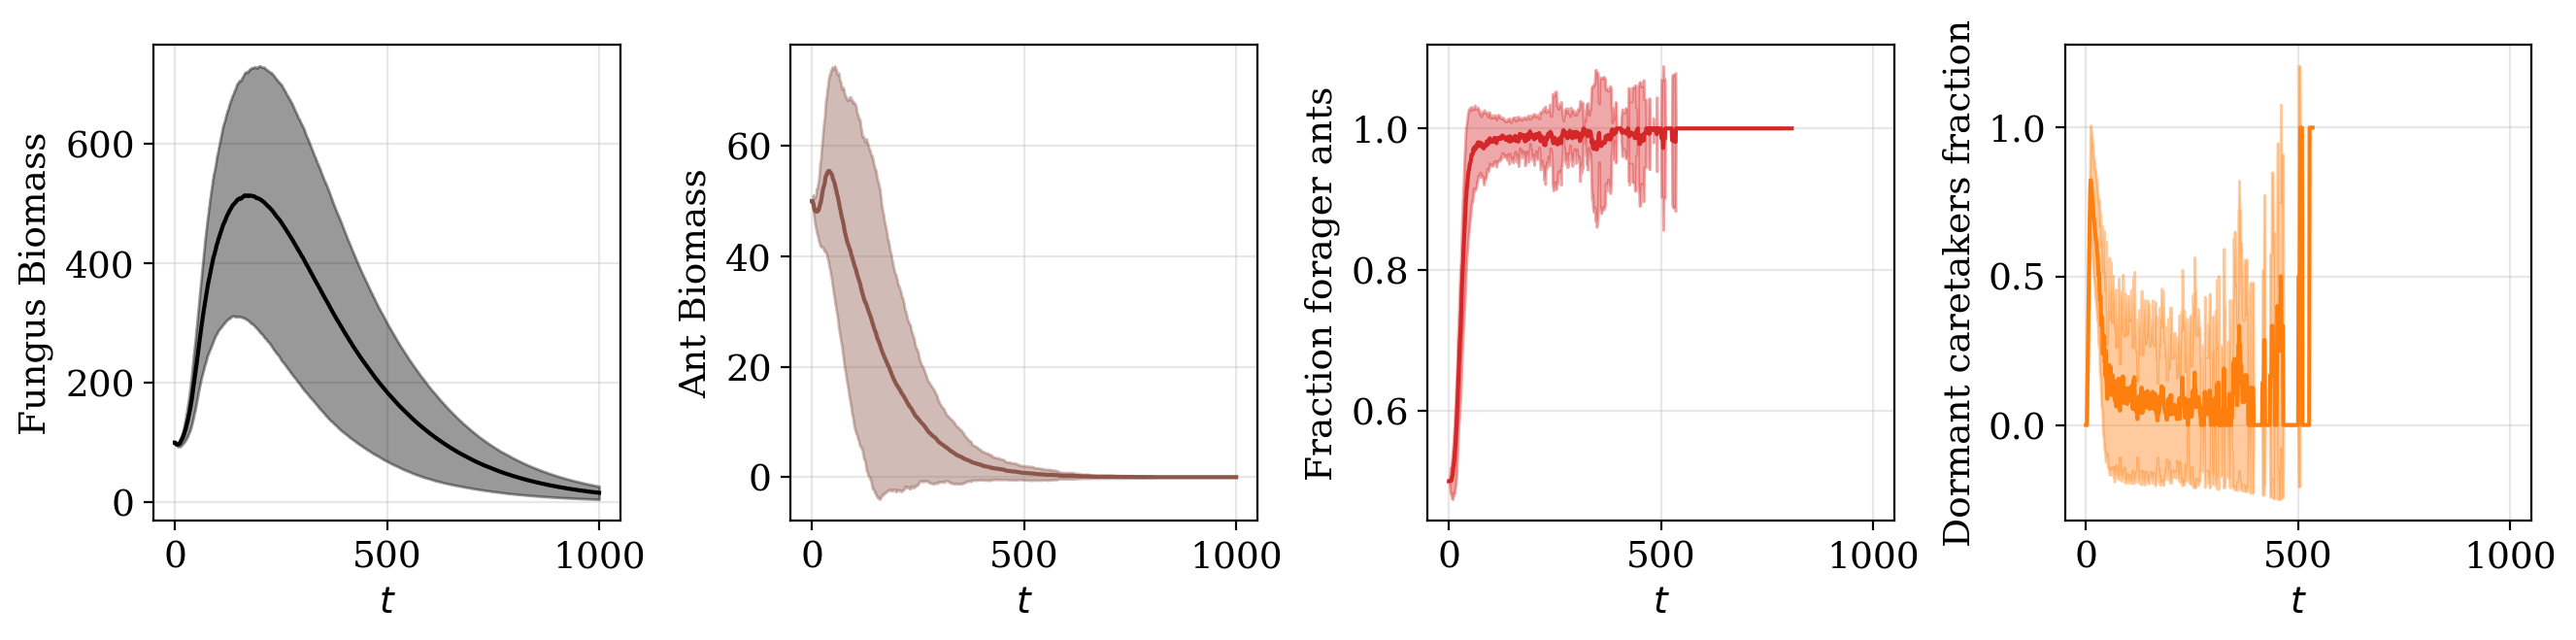

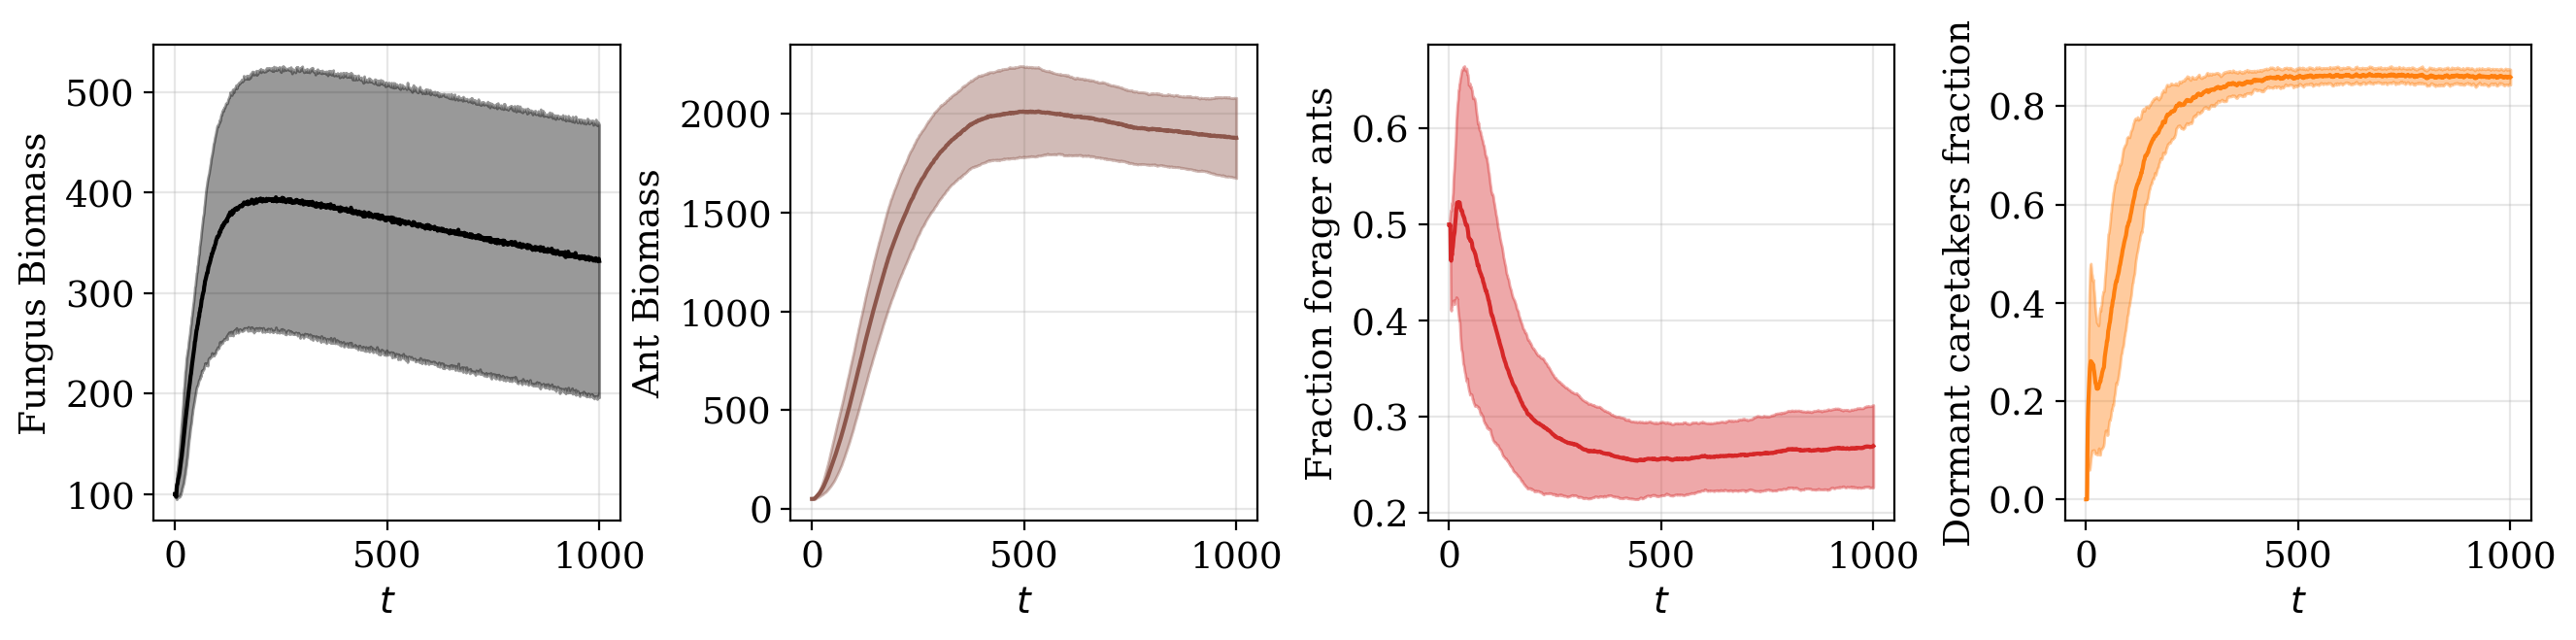

In [17]:
plot_mean_std(extinct_ex1, experiment_name = "Global look extinct.pdf", measures = cols, colors = colors, x_lim=1000)
plot_mean_std(survive_ex1,  experiment_name = "Global look survive.pdf", measures = cols, colors = colors, x_lim=1000)

Probably in appendix or not in paper: 

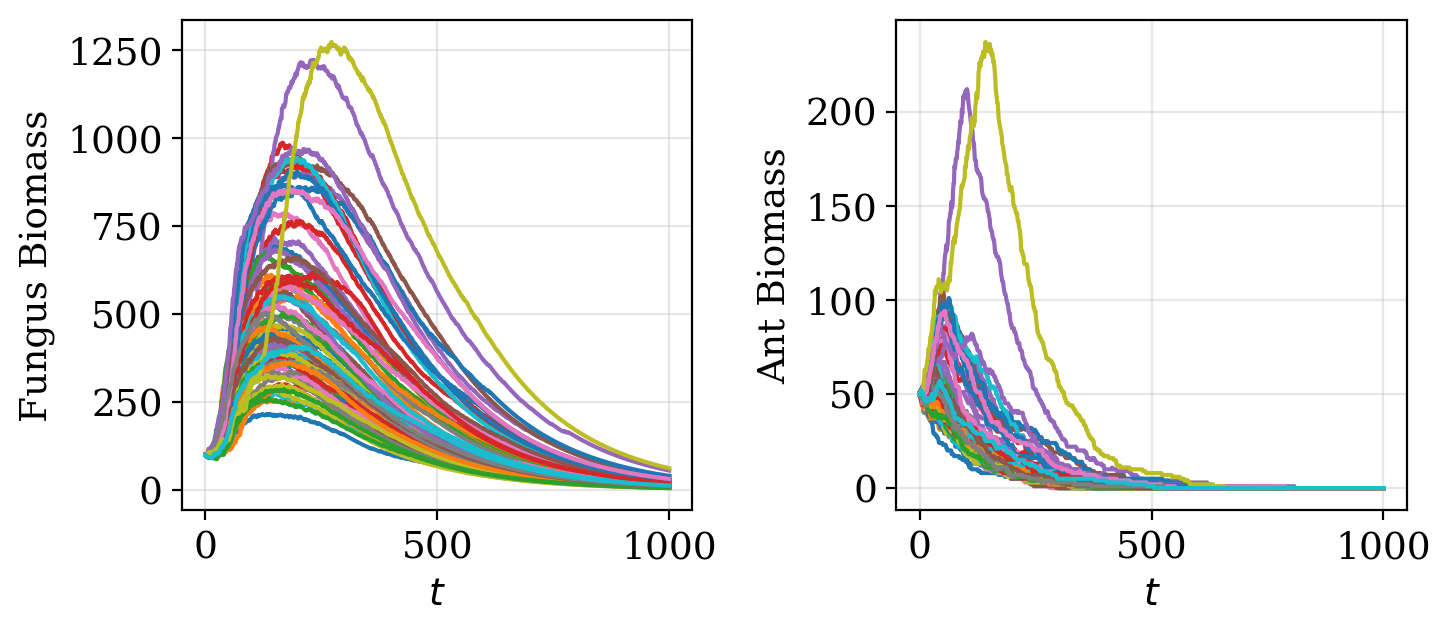

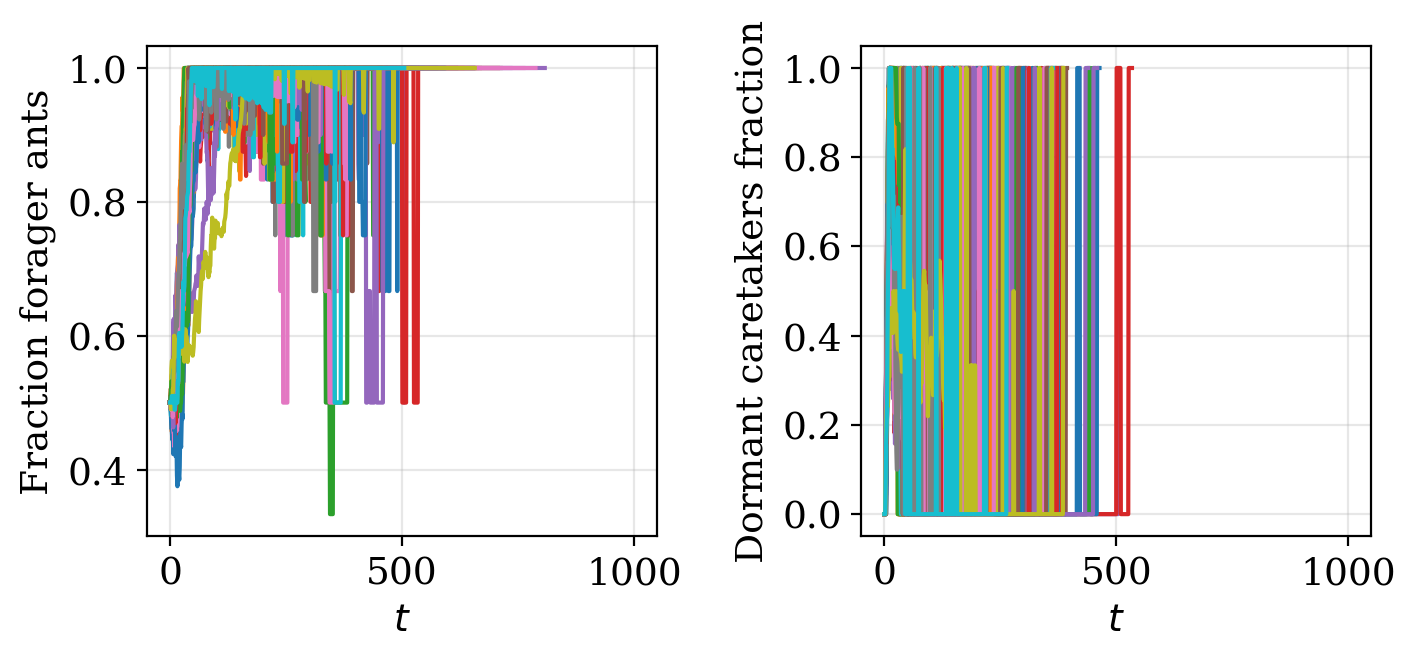

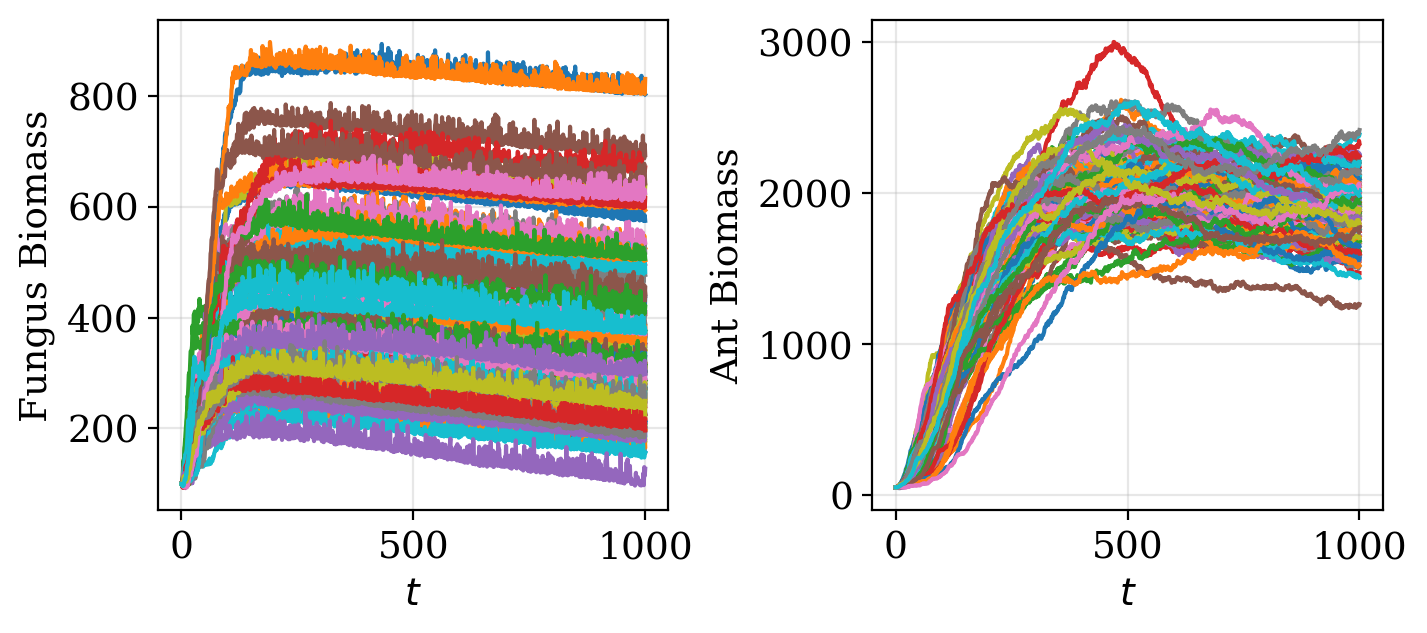

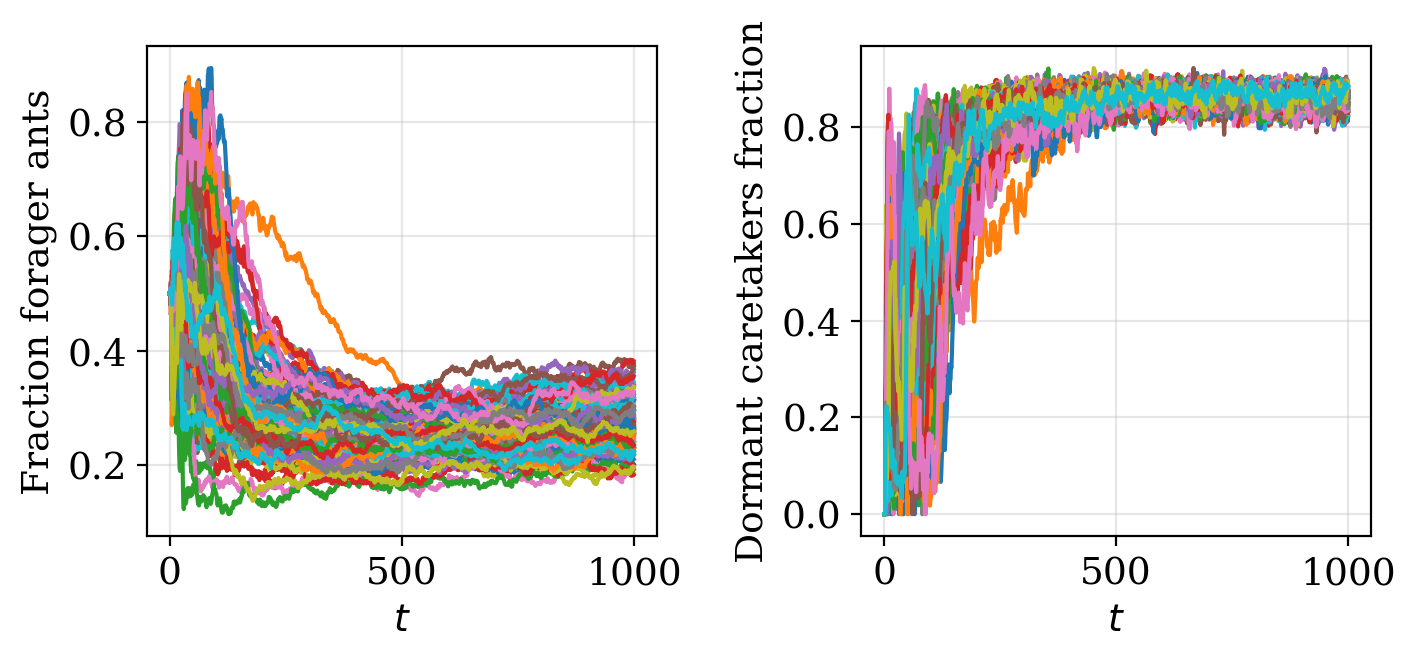

In [25]:
plot_runs(extinct_ex1,  file_name = "Global look extinct all runs02.pdf", measures = cols[0:2], colors = colors, x_lim=1000,
          wspace=0.4, figsize=TWO_COL_FIGSIZE)
plot_runs(extinct_ex1,  file_name = "Global look extinct all runs24.pdf", measures = cols[2:4], colors = colors, x_lim=1000,
          wspace=0.4, figsize=TWO_COL_FIGSIZE)
plot_runs(survive_ex1, file_name = "Global look survive all runs02.pdf", measures = cols[0:2], colors = colors, x_lim=1000,
          wspace=0.4, figsize=TWO_COL_FIGSIZE)
plot_runs(survive_ex1, file_name = "Global look survive all runs24.pdf", measures = cols[2:4], colors = colors, x_lim=1000,
          wspace=0.4, figsize=TWO_COL_FIGSIZE)

Probably in appendix or not in paper: 

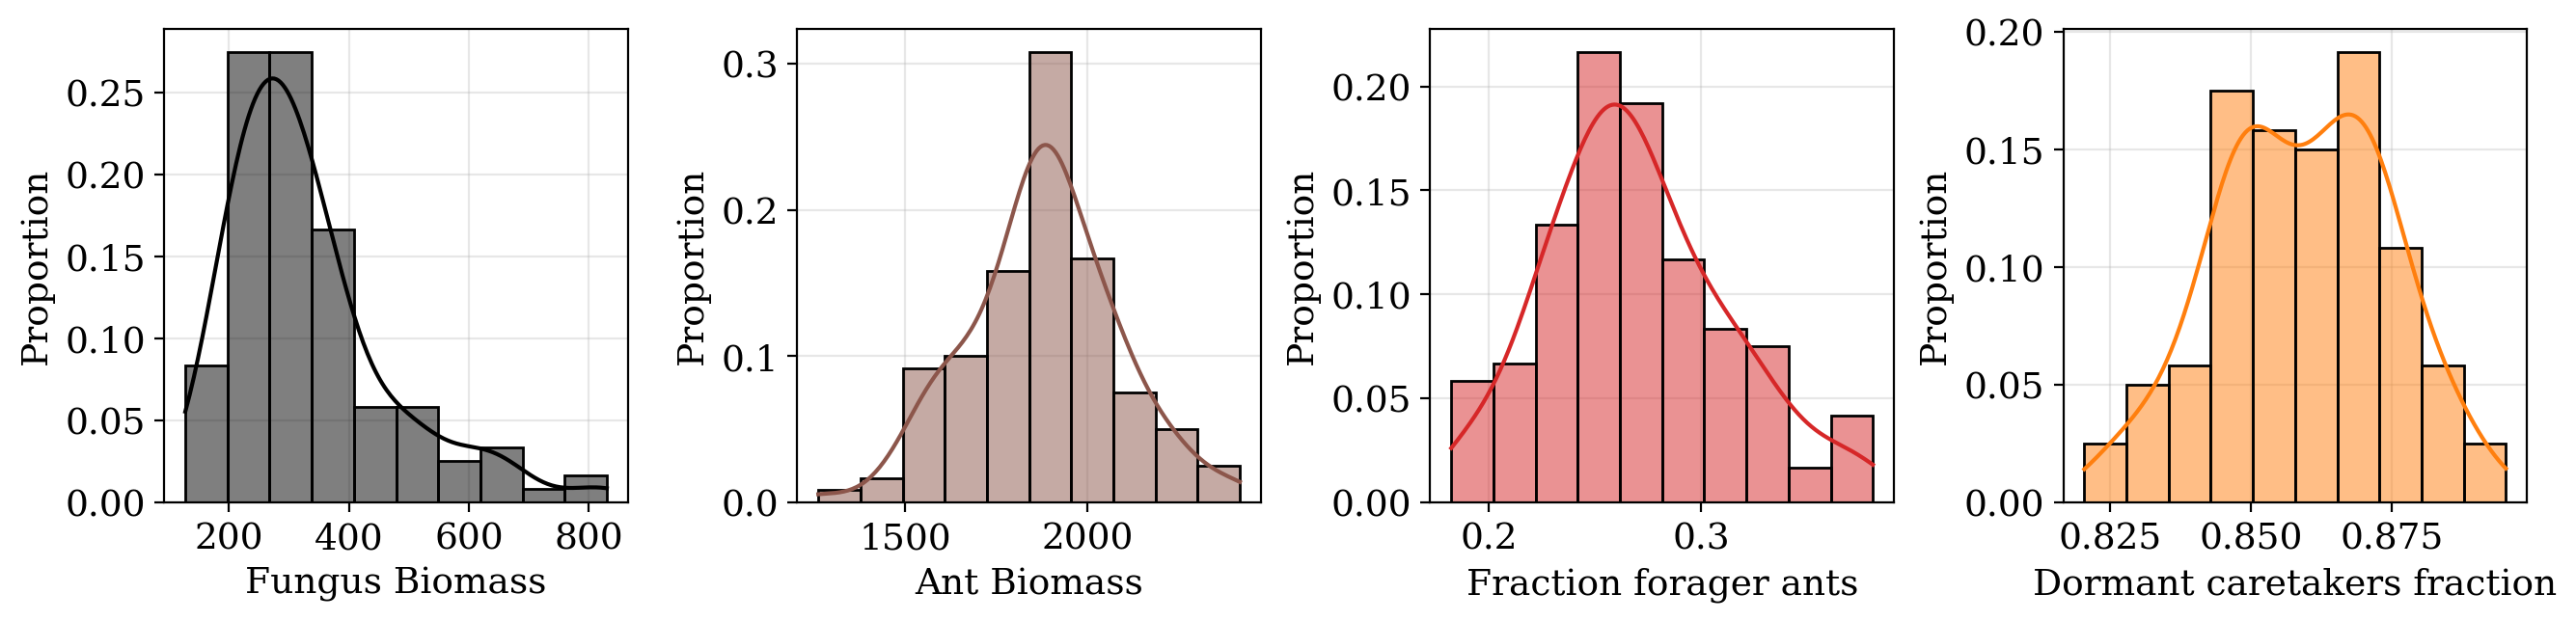

In [31]:
plot_hist(survive_ex1, file_name = "Runs_non_extinct_30_100_hist.pdf", measures = cols, colors = colors)

## Focused look

The question really here is: What happens in that crucial initial stage, where some population go extinct? A connection can be found with the amounts of ants with leaves, which is having trouble to establish those initial pheromone trails.  

In [28]:
def plot_mean_std_overlay(list_dfs_states, measure, colours, y_range_max=None, x_lim=None):
    fig = plt.figure(figsize=(FOUR_COL_FIGSIZE[0]/4, 3.25))
    x_lim += 1
    
    i = 0
    for state in list_dfs_states: 
        concat_df = pd.concat(state)
        grouped_df = concat_df.groupby(level=0)
        means_df = grouped_df.mean()
        std_df = grouped_df.std()

        plt.plot(range(x_lim), means_df[measure][:x_lim], label=measure, color=colours[i])
    
        mean_min_std = means_df[measure] - std_df[measure]
        #mean_min_std[mean_min_std < 0] = 0

        plt.fill_between(range(x_lim),
                         mean_min_std[:x_lim], means_df[measure][:x_lim] + std_df[measure][:x_lim],
                         alpha=0.4, color=colours[i])
        plt.xlabel("$t$")
        plt.ylabel(f"{measure}")

        if y_range_max:
            plt.ylim(-0.05*y_range_max, y_range_max+0.05*y_range_max)

        if x_lim:
            plt.xlim(-0.05*x_lim, x_lim+0.05*x_lim)
            
        i += 1

        plt.legend(["Extinct", "Successful"], loc = 1)
        plt.tight_layout()
        plt.savefig(f"figures/experiments/Focused look/{measure}.pdf", bbox_inches='tight')
    plt.show()

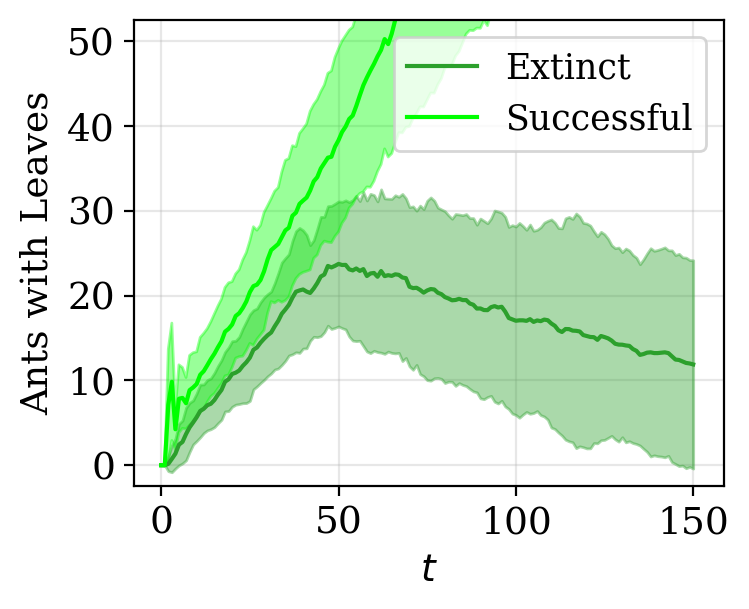

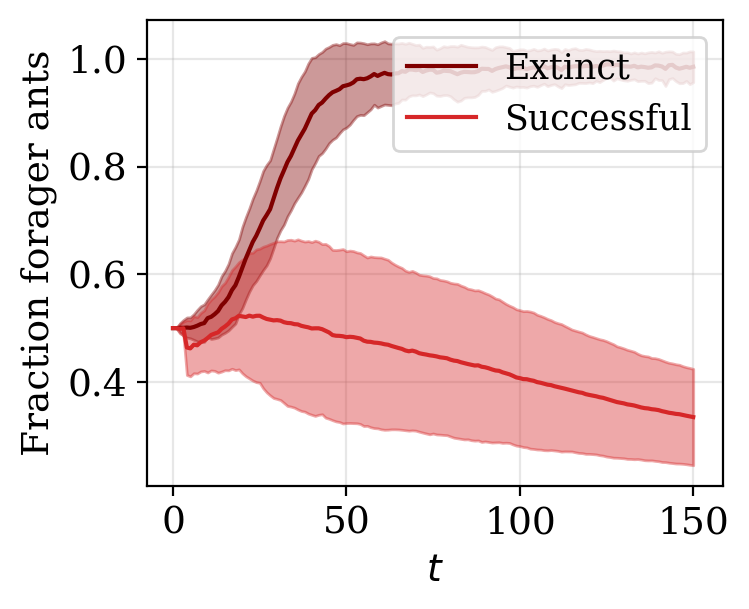

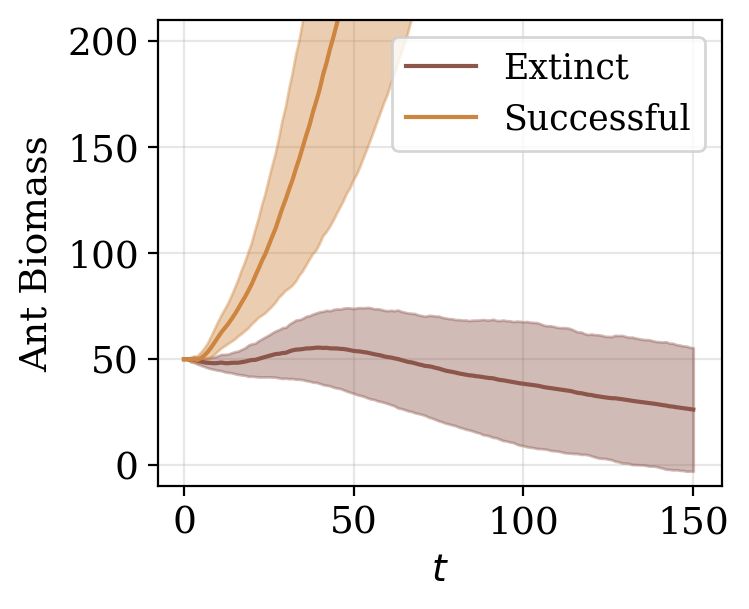

In [29]:
plot_mean_std_overlay([extinct_ex1, survive_ex1], measure = "Ants with Leaves", colours = ["tab:green", "lime"],
                     y_range_max=50, x_lim=150)
plot_mean_std_overlay([extinct_ex1, survive_ex1], measure = "Fraction forager ants", colours = [ "maroon", "tab:red"],
                      x_lim=150)
plot_mean_std_overlay([extinct_ex1, survive_ex1], measure = "Ant Biomass", colours = ["tab:brown", "peru"],
                      y_range_max=200, x_lim=150)

# Experiment 2

In [61]:
data_30_100 = np.load("data/time_steps_data_experiment_2_30pl_100le.npz", allow_pickle=True)
dfs_30_100 = [pd.DataFrame.from_dict(d) for d in data_30_100["results"]]
t = len(dfs_30_100[0])

data_60_50 = np.load("data/time_steps_data_experiment_2_60pl_50le.npz", allow_pickle=True)
dfs_60_50 = [pd.DataFrame.from_dict(d) for d in data_60_50["results"]]

data_120_25 = np.load("data/time_steps_data_experiment_2_120pl_25le.npz", allow_pickle=True)
dfs_120_25 = [pd.DataFrame.from_dict(d) for d in data_120_25["results"]]

In [62]:
extinct_30_100 = []
survive_30_100 = []
n_extinctions = 0
for df in dfs_30_100:
    if df["Ant Biomass"].iloc[-1] < 5:
        n_extinctions += 1
        extinct_30_100.append(df)
    else: 
        survive_30_100.append(df)
print(f"{n_extinctions} out of {len(dfs_30_100)} runs went extinct")

137 out of 200 runs went extinct


In [63]:
extinct_60_50 = []
survive_60_50 = []
n_extinctions = 0
for df in dfs_60_50:
    if df["Ant Biomass"].iloc[-1] < 5:
        n_extinctions += 1
        extinct_60_50.append(df)
    else: 
        survive_60_50.append(df)
print(f"{n_extinctions} out of {len(dfs_60_50)} runs went extinct")

84 out of 200 runs went extinct


In [64]:
extinct_120_25 = []
survive_120_25 = []
n_extinctions = 0
for df in dfs_120_25:
    if df["Ant Biomass"].iloc[-1] < 5:
        n_extinctions += 1
        extinct_120_25.append(df)
    else: 
        survive_120_25.append(df)
print(f"{n_extinctions} out of {len(dfs_120_25)} runs went extinct")

35 out of 200 runs went extinct


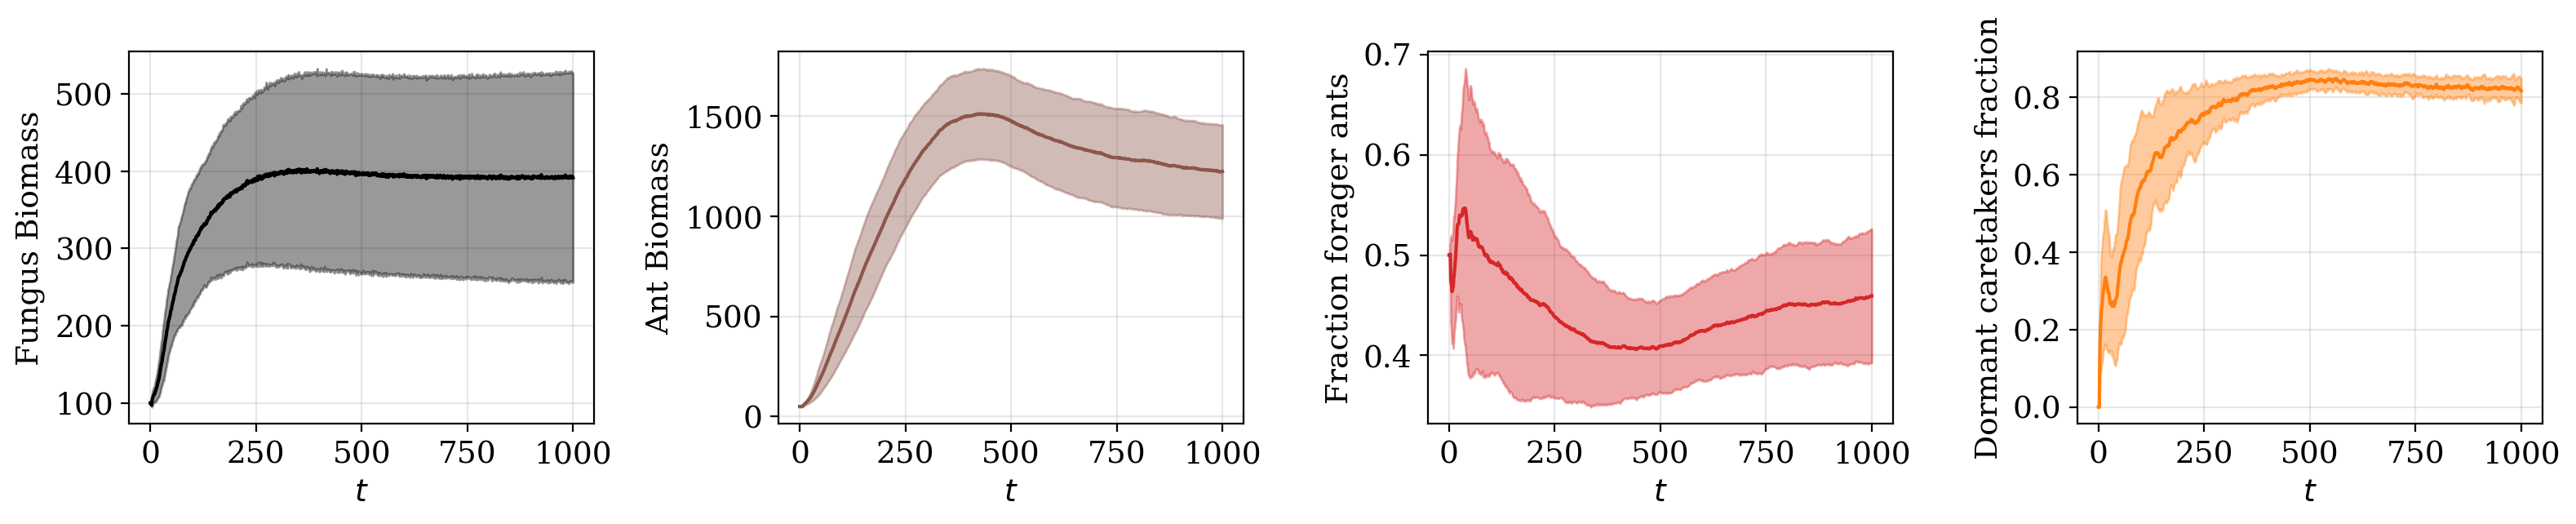

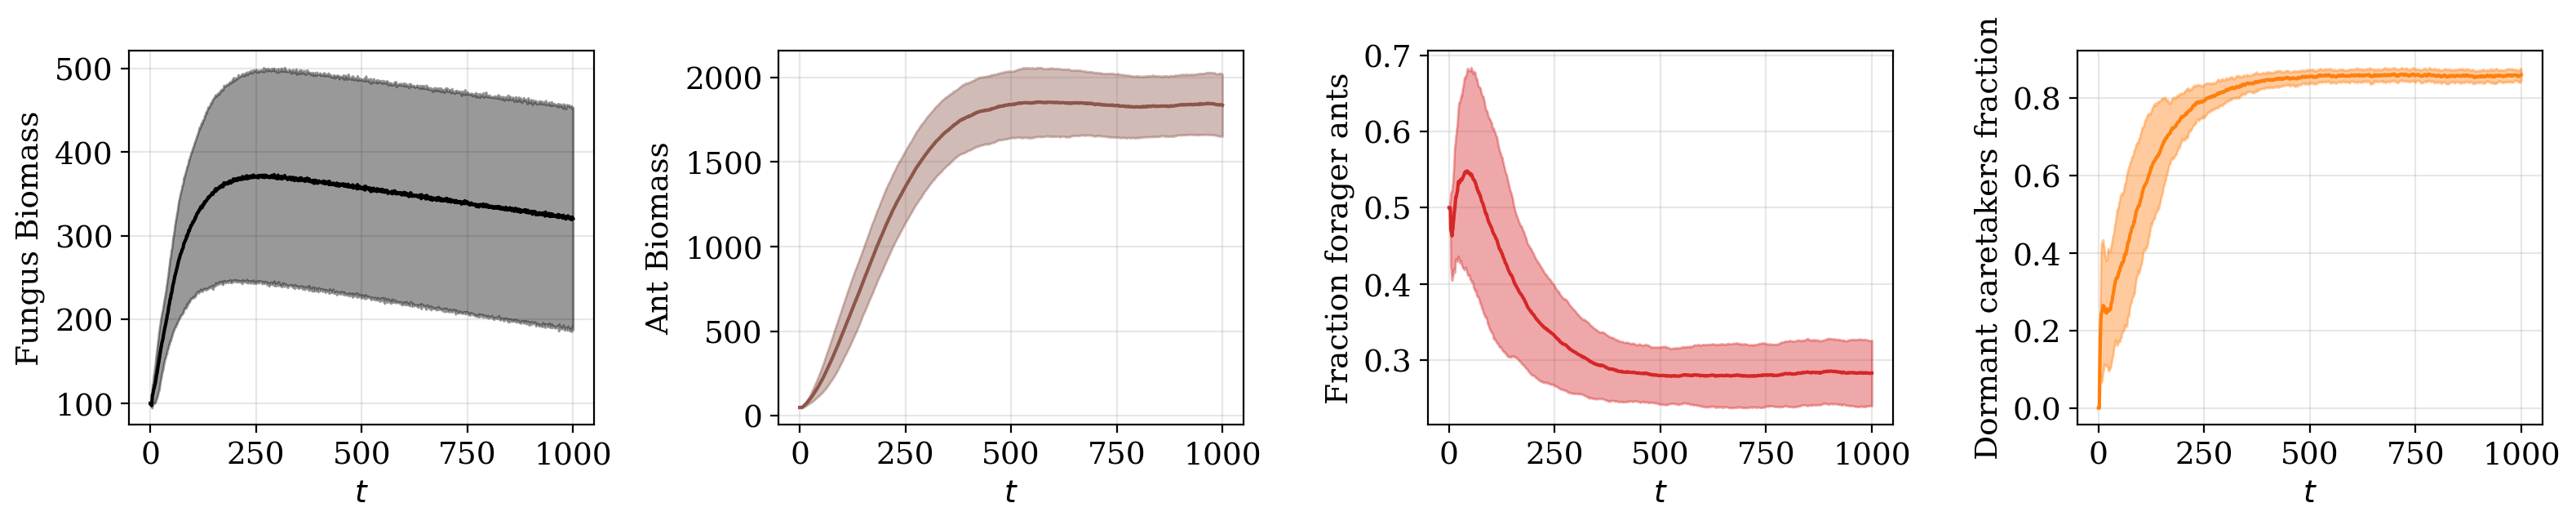

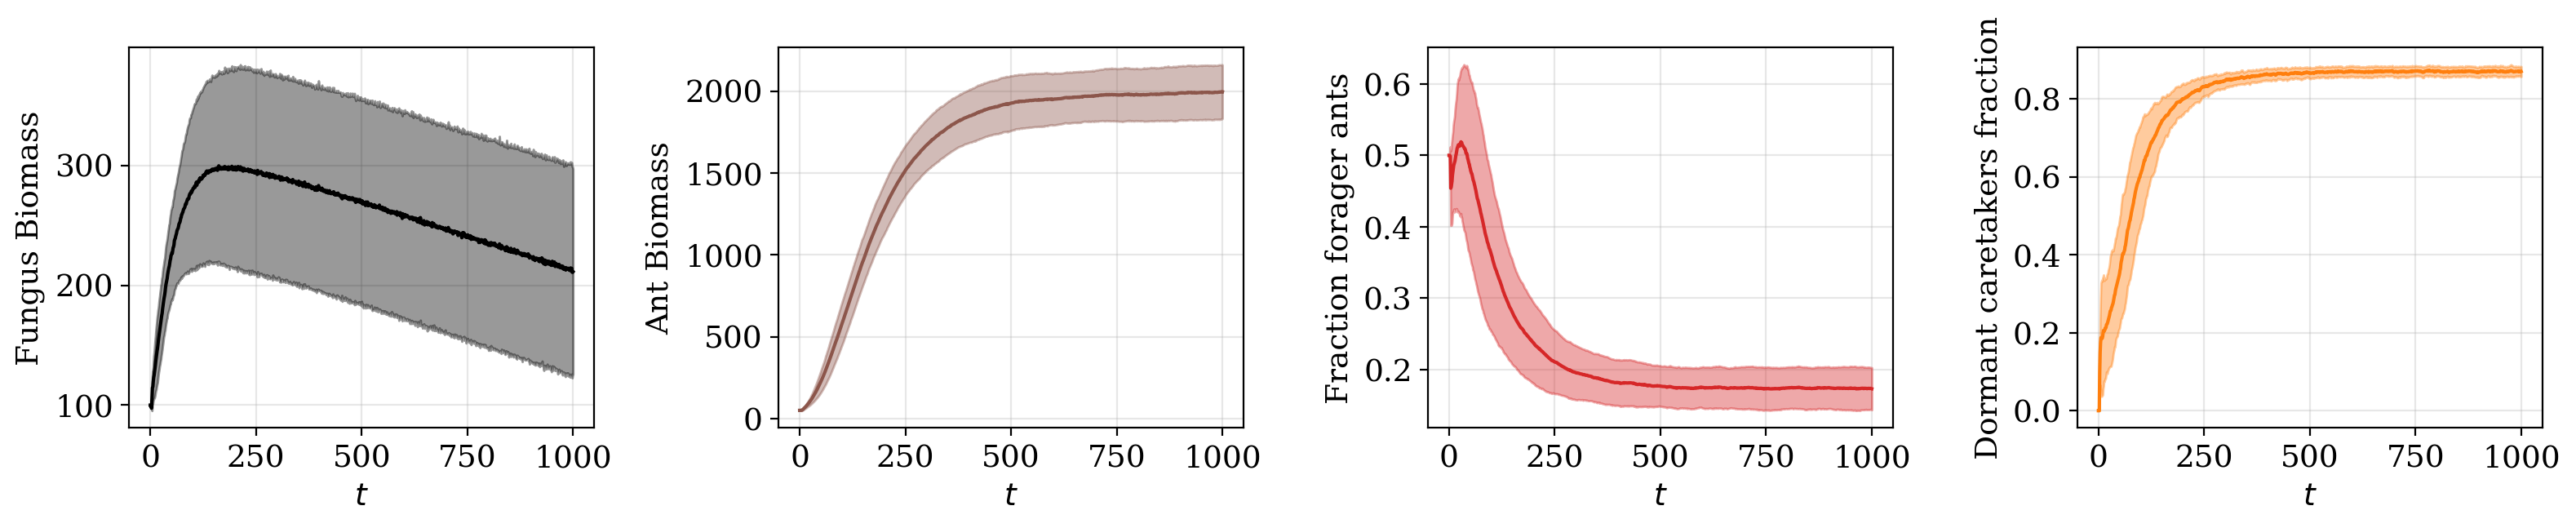

In [65]:
cols2 = ("Fungus Biomass", "Ant Biomass", "Fraction forager ants", "Dormant caretakers fraction")
colors2 = ("black", "tab:brown", "tab:red", "tab:orange")
plot_mean_std(survive_30_100, experiment_name = "Stats_non_extinct_30_100_ex2.pdf", measures = cols2, colors = colors2)
plot_mean_std(survive_60_50, experiment_name = "Stats_non_extinct_60_50_ex2.pdf", measures = cols2, colors = colors2)
plot_mean_std(survive_120_25, experiment_name = "Stats_non_extinct_120_25_ex2.pdf", measures = cols2, colors = colors2)

#plot_runs(non_extinct_dfs_30_100, title = "30 plants, 100 leaves", file_name = "Stats_extinct_30_100.pdf")
#plot_runs(non_extinct_dfs_60_50, title = "60 plants, 50 leaves")
#plot_runs(non_extinct_dfs_120_25, title = "120 plants, 25 leaves")